In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

sns.set_theme()

In [2]:
# Cargamos el dataset
df = pl.read_csv("../DATASET/descargas_app_cdmx_05082022.csv")

In [3]:
df.schema

Schema([('descargas', Int64), ('fecha', String), ('sist_op', String)])

In [4]:
df.to_pandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   descargas  2455 non-null   int64 
 1   fecha      2455 non-null   object
 2   sist_op    2455 non-null   object
dtypes: int64(1), object(2)
memory usage: 57.7+ KB


In [5]:
df.describe()

statistic,descargas,fecha,sist_op
str,f64,str,str
"""count""",2455.0,"""2455""","""2455"""
"""null_count""",0.0,"""0""","""0"""
"""mean""",1561.807332,null,null
"""std""",2349.040146,null,null
"""min""",4.0,"""2019-03-23""","""Android"""
"""25%""",282.0,null,null
"""50%""",671.0,null,null
"""75%""",2611.0,null,null
"""max""",48415.0,"""2022-08-05""","""iOS"""


In [6]:
# LabelEncoder para codificar la variable categórica
le = LabelEncoder()

In [7]:
# Convertimos el tipo fecha a datetime
df = df.with_columns(
    pl.col("fecha").str.strptime(pl.Date, "%Y-%m-%d"),
    sist_op = le.fit_transform(df["sist_op"]),
    sist_op_lbl = df["sist_op"]
)

In [8]:
df.describe()

statistic,descargas,fecha,sist_op,sist_op_lbl
str,f64,str,f64,str
"""count""",2455.0,"""2455""",2455.0,"""2455"""
"""null_count""",0.0,"""0""",0.0,"""0"""
"""mean""",1561.807332,"""2020-11-29 17:48:07.331000""",0.498167,null
"""std""",2349.040146,null,0.500099,null
"""min""",4.0,"""2019-03-23""",0.0,"""Android"""
"""25%""",282.0,"""2020-01-28""",0.0,null
"""50%""",671.0,"""2020-11-30""",0.0,null
"""75%""",2611.0,"""2021-10-03""",1.0,null
"""max""",48415.0,"""2022-08-05""",1.0,"""iOS"""


In [9]:
le.classes_

array(['Android', 'iOS'], dtype='<U7')

In [10]:
df.head()

descargas,fecha,sist_op,sist_op_lbl
i64,date,i64,str
23,2019-03-23,0,"""Android"""
395,2019-03-24,0,"""Android"""
825,2019-03-25,0,"""Android"""
448,2019-03-26,0,"""Android"""
316,2019-03-27,0,"""Android"""


In [11]:
df_descargas = df.group_by(
    "sist_op_lbl"
).agg(
    pl.col("descargas").sum().alias("descargas")
)

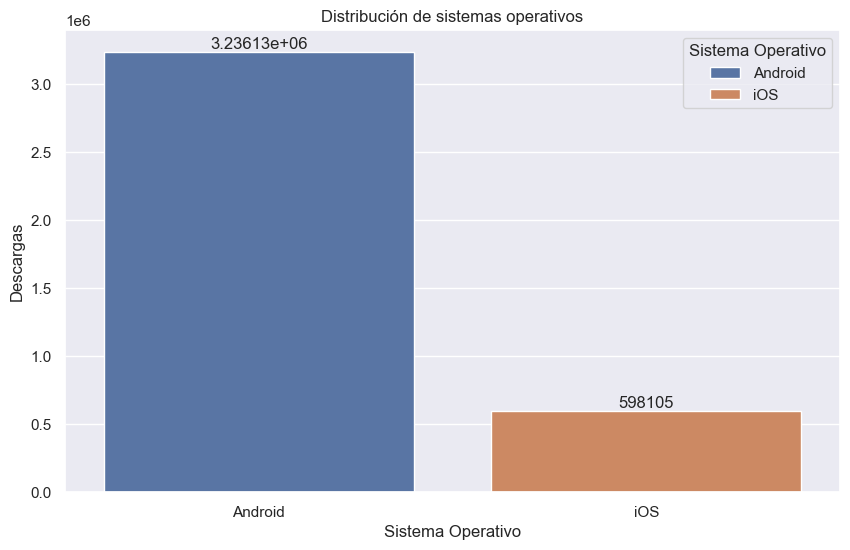

In [12]:
# Visualizamos la variable categórica
fig, ax = plt.subplots(figsize=(10, 6))
g = sns.barplot(df_descargas, x="sist_op_lbl", y="descargas", hue="sist_op_lbl", ax=ax, legend=True)
g.set_title("Distribución de sistemas operativos")
g.set_xlabel("Sistema Operativo")
g.set_ylabel("Descargas")
plt.legend(title="Sistema Operativo", loc='upper right')

for i in ax.containers:
    ax.bar_label(i,)
    
plt.show(g)